# This notebook simulates the di-lepton decays of HNLs


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.pyplot import *
from matplotlib.legend_handler import HandlerLine2D

from hnl_apps import *
from hnl_apps import hnl_tools
from hnl_apps.const import *
from hnl_apps import decay_generator as gen
from hnl_apps.plot_tools import *

### Generate and load events

In [3]:
my_model = model.hnl_model(m4=0.150, mixings = [0.0,1e-6,0.0], 
                           dipoles = [0.0,0.0,0.0], 
                           dark_coupl=[1.0,1e-2,1.0,1.25],
                           GX = 0.0, minimal=True, HNLtype="dirac")
my_model.set_high_level_variables()
# my_model.dmu4

In [4]:
PATH = 'data/MC_samples'
vertex='NConly'
vertex1='CConly'
h='LH'
hnltype='dirac'
hnlmass=0.150
my_mixing=[0,1,0]
gen.generate_events(hnlmass, mixings=my_mixing, lepton_mass=m_e,
                           dark_coupl=[1.0,1,1.0,1.25],                            
                                    HNLtype=hnltype, HEL=h,
                                    modify_vertex=vertex)

gen.generate_events(hnlmass, mixings=my_mixing, lepton_mass=m_e,
                           dipoles = [0.0,1e-6,0.0], 
                                    HNLtype=hnltype, HEL=h,
                                    modify_vertex=vertex)

gen.generate_events(hnlmass, mixings=my_mixing, lepton_mass=m_e,
                                    HNLtype=hnltype, HEL=h,
                                    modify_vertex=vertex1)

dfs={}
dfs[f'{hnlmass}_ee_{h}_{hnltype}_{vertex}'] = pd.read_pickle(f'{PATH}/MC_m4_{hnlmass:.8g}_mlepton_{m_e:.8g}_hel_{h}_{hnltype}_{vertex1}.pckl')
dfs[f'{hnlmass}_ee_{h}_{hnltype}_{vertex}_zpr'] = pd.read_pickle(f'{PATH}/MC_m4_{hnlmass:.8g}_mlepton_{m_e:.8g}_hel_{h}_{hnltype}_{vertex}_zpr.pckl')
dfs[f'{hnlmass}_ee_{h}_{hnltype}_{vertex}_dip'] = pd.read_pickle(f'{PATH}/MC_m4_{hnlmass:.8g}_mlepton_{m_e:.8g}_hel_{h}_{hnltype}_{vertex}_dip.pckl')
# compute useful variables
for key in dfs.keys():
    gen.compute_kin_vars(dfs[key])

data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_dirac_NConly_zpr.pckl
data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_dirac_NConly_dip.pckl
data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_dirac_CConly.pckl


/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(uf

In [8]:
from hnl_apps import *

my_list_of_colors = ['royalblue','deeppink','black','lime']
my_list_of_dashes = ['-','-','-','-']
my_hatches = ['/////////////////////////////',
              '/////////////////////////////',
              '/////////////////////////////',
              '/////////////////////////////']
def plot_new_physics(var, MIN,MAX, hnltype='dirac', hel='LH', xlabel='x', colors=my_list_of_colors, units = 1, cum=''):

    fig,ax = std_fig()
#     gca().set_rasterization_zorder(0)

    error_histogram(ax, dfs[f'{hnlmass}_ee_{h}_{hnltype}_{vertex}_zpr'], var, var_range=(MIN,MAX), units = units,
                     color=my_list_of_colors[0],label=fr'vector four-fermion', 
                        density=True, ls=my_list_of_dashes[0], hatch=my_hatches[0],
                       cumulative=cum)

    error_histogram(ax, dfs[f'{hnlmass}_ee_{h}_{hnltype}_{vertex}_dip'], var, var_range=(MIN,MAX), units = units,
                     color=my_list_of_colors[1],label=fr'magnetic moment', 
                        density=True, ls=my_list_of_dashes[1], hatch=my_hatches[1],
                       cumulative=cum)

    error_histogram(ax, dfs[f'{hnlmass}_ee_{h}_{hnltype}_{vertex}'], var, var_range=(MIN,MAX), units = units,
                     color=my_list_of_colors[2],label=fr'NC only', 
                        density=True, ls=my_list_of_dashes[2], hatch=my_hatches[2],
                       cumulative=cum)

    
    
    ax.patch.set_alpha(0.0)
    ax.legend(loc='best',frameon=False,ncol=1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(r"a.u.")
    ax.set_xlim(MIN,MAX)
    ax.set_ylim(0.,ax.get_ylim()[1]*1.1)
    ax.set_title(fr"$N \to \nu e^+e^-$ $-$ {hel} {hnltype} \,\, $m_N = {hnlmass*1e3:.0f}$ MeV",fontsize=fsize)

    my_path=f'plots/kinematics/{hnltype}/newphysics/{cum}/'
    filename=f'{hnlmass*1e3:.0f}_{hnltype}_{hel}_newphysics_{var}'
    Path(my_path).mkdir(parents=True, exist_ok=True)
    print(filename)

    #     plt.savefig(f"{my_path}{filename}.png", dpi=400)
    fig.savefig(f"{my_path}{filename}.pdf", dpi=100)
    plt.close()
    
    
def all_vars_new_physics(cum='', hnltype='dirac', hel='LH'):
    plot_new_physics('easy',-1,1, xlabel=r'$(E_{e^+} - E_{e^-})/(E_{e^+} + E_{e^-})$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('ee_momentum',0,7, xlabel=r'$E_{ee}/$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('eplus',0,7, xlabel=r'$E_{e^+}/$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('eminus',0,7, xlabel=r'$E_{e^-}/$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('e_smallest',0,7, xlabel=r'$E_{e}^{\rm min}/$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('e_largest',0,7, xlabel=r'$E_{e}^{\rm max}/$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('ee_theta',0,90, units = 180/np.pi, xlabel=r'$\Delta \theta_{ee}\,(^\circ)$', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('ee_beam_theta',0,90, units = 180/np.pi, xlabel=r'$\theta_{ee}^{\rm beam} \, (^\circ)$', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('ee_beam_costheta',0.98,1, units = 1, xlabel=r'$\cos(\theta_{ee}^{\rm beam})$', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('radius_plus',0,100, units = 1e-2, xlabel=r'$e^+$ curvature radius (m)', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('distance_between_circles_at_10cm',0,10, units = 1, xlabel=r'distance between bent trajectories at 10 cm', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('distance_between_circles_at_20cm',0,20, units = 1, xlabel=r'distance between bent trajectories at 20 cm', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('distance_between_circles_at_50cm',0,50, units = 1, xlabel=r'distance between bent trajectories at 50 cm', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('race_to_b=1cm',0,10, units = 1e-2, xlabel=r'travel distance to b=1 (cm)', 
                    cum=cum, hnltype=hnltype, hel=hel)
    plot_new_physics('ee_mass',0,hnlmass*1e3, units = 1e3, xlabel=r'$e^+e^-$ invariant mass (MeV)', 
                    cum=cum, hnltype=hnltype, hel=hel)    

In [9]:
all_vars_new_physics()
# all_vars_new_physics(cum='cum_sum')
# all_vars_new_physics(cum='cum_sum_prior_to')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_easy


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_ee_momentum


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_eplus


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_eminus


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_e_smallest


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_e_largest


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_ee_theta


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_ee_beam_theta


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_ee_beam_costheta


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_radius_plus


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_distance_between_circles_at_10cm


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_distance_between_circles_at_20cm


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_distance_between_circles_at_50cm


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_race_to_b=1cm


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


150_dirac_LH_newphysics_ee_mass


In [111]:
# PATH = 'data/MC_samples'
# hels = ['LH','RH', 'both']
# vertices = ['CConly', 'NConly', 'CCandNC']
# hnltypes = ['majorana','dirac']
# hnlmasses = [0.02,0.05,0.1,0.150]
# my_mixing = [0.0,1.0,0.0]

PATH = 'data/MC_samples'
hels = ['LH']
vertices = ['NConly','CConly','CCandNC']
# vertices = ['CConly','CCandNC']
hnltypes = ['dirac','majorana']
# hnlmasses = [0.02,0.05,0.1,0.250]
hnlmasses = [0.150]
my_mixing = [0.0,1.0,0.0]

dfs = {}
for h in hels:
    for vertex in vertices:
        for hnltype in hnltypes:
            for hnlmass in hnlmasses:
                gen.generate_events(hnlmass, mixings=my_mixing, lepton_mass=m_e, 
                                    HNLtype=hnltype, HEL=h, 
                                    modify_vertex=vertex)
                dfs[f'{hnlmass}_ee_{h}_{hnltype}_{vertex}'] = pd.read_pickle(f'{PATH}/MC_m4_{hnlmass:.8g}_mlepton_{m_e:.8g}_hel_{h}_{hnltype}_{vertex}.pckl')
# compute useful variables
for key in dfs.keys():
    gen.compute_kin_vars(dfs[key])

data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_dirac_NConly.pckl
data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_majorana_NConly.pckl
data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_dirac_CConly.pckl
data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_majorana_CConly.pckl
data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_dirac_CCandNC.pckl
data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_majorana_CCandNC.pckl


### Plotting all variables for varying m4 values

In [99]:
from pathlib import Path


In [100]:
my_list_of_colors = ['black','deeppink','royalblue','orange']*5
# colors = cm.get_cmap('brg')
# my_list_of_colors=colors(np.linspace(0,1,7))
my_list_of_dashes = ['-','-','-','-']*5
my_hatches = ['/////////////////////////////',
              '/////////////////////////////',
              '/////////////////////////////',
              '/////////////////////////////']*5

def plot_varying_m4(var, MIN,MAX, hnltype='majorana', hel='LH', vertex='NConly', xlabel='x', colors=my_list_of_colors, units = 1, cum=''):

    fig,ax = std_fig()
    
    for i in range(len(hnlmasses)):
        mN = hnlmasses[i]
#         my_histogram(ax, dfs[f'{mN}_ee_{hel}_{hnltype}_{vertex}'], var, var_range=(MIN, MAX), units = units,
#                      color=colors[i],label=fr'$m_N = {mN*1e3}$ MeV', density=True, ls=my_list_of_dashes[i], hatch=my_hatches[i])
        error_histogram(ax, dfs[f'{mN}_ee_{hel}_{hnltype}_{vertex}'], var, var_range=(MIN, MAX), units = units,
                         color=colors[i],label=fr'$m_N = {mN*1e3}$ MeV', 
                            density=True, ls=my_list_of_dashes[i], hatch=my_hatches[i],
                           cumulative=cum)
        

    ax.patch.set_alpha(0.0)

    
    ax.legend(loc='best',frameon=False,ncol=1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(r"a.u.")
    ax.set_xlim(MIN,MAX)
    ax.set_ylim(0.,ax.get_ylim()[1]*1.1)
    # ax.set_yscale('log')
    ax.set_title(fr"$N \to \nu e^+e^-$ $-$ {hnltype} {hel} {vertex}",fontsize=fsize)
    my_path=f'plots/kinematics/{hnltype}/{vertex}/{cum}/'
    filename=f'{hnltype}_{hel}_{vertex}_{var}'
    Path(my_path).mkdir(parents=True, exist_ok=True)
    print(filename)
#     plt.savefig(f"plots/kinematics/{filename}.png", dpi=400)
    plt.savefig(f"{my_path}{filename}.pdf")
    plt.close()

def all_vars(cum='', hnltype='majorana', hel='LH', vertex='NConly'):
    plot_varying_m4('easy',-1,1, xlabel=r'$(E_{e^+} - E_{e^-})/(E_{e^+} + E_{e^-})$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('ee_momentum',0,7, xlabel=r'$E_{ee}/$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('e_smallest',0,7, xlabel=r'$E_{e}^{\rm min}/$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('e_largest',0,7, xlabel=r'$E_{e}^{\rm max}/$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('ee_theta',0,30, units = 180/np.pi, xlabel=r'$\Delta \theta_{ee}\,(^\circ)$', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('ee_beam_theta',0,20, units = 180/np.pi, xlabel=r'$\theta_{ee}^{\rm beam} \, (^\circ)$', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('ee_beam_costheta',0.998,1, units = 1, xlabel=r'$\cos(\theta_{ee}^{\rm beam})$', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('radius_plus',0,100, units = 1e-2, xlabel=r'curvature radius (m)', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('distance_between_circles_at_10cm',0,10, units = 1, xlabel=r'distance between bent trajectories at 10 cm', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('distance_between_circles_at_20cm',0,20, units = 1, xlabel=r'distance between bent trajectories at 20 cm', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('distance_between_circles_at_50cm',0,50, units = 1, xlabel=r'distance between bent trajectories at 50 cm', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('race_to_b=1cm',0,10, units = 1e-2, xlabel=r'travel distance to b=1 (cm)', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)
    plot_varying_m4('ee_mass',0,250, units = 1e3, xlabel=r'$e^+e^-$ invariant mass (MeV)', 
                    cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)

cum_types = ['', 'cum_sum', 'cum_sum_prior_to']
def batch_plot_kinematics():
    for cum in cum_types:
        for hnltype in hnltypes:
            for hel in ['LH']:
                for vertex in vertices:
                    all_vars(cum=cum, hnltype=hnltype, hel=hel, vertex=vertex)

                    

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
batch_plot_kinematics()

dirac_LH_CConly_easy
dirac_LH_CConly_ee_momentum
dirac_LH_CConly_e_smallest
dirac_LH_CConly_e_largest
dirac_LH_CConly_ee_theta
dirac_LH_CConly_ee_beam_theta
dirac_LH_CConly_ee_beam_costheta
dirac_LH_CConly_radius_plus
dirac_LH_CConly_distance_between_circles_at_10cm
dirac_LH_CConly_distance_between_circles_at_20cm
dirac_LH_CConly_distance_between_circles_at_50cm
dirac_LH_CConly_race_to_b=1cm
dirac_LH_CConly_ee_mass
dirac_LH_CCandNC_easy
dirac_LH_CCandNC_ee_momentum
dirac_LH_CCandNC_e_smallest
dirac_LH_CCandNC_e_largest
dirac_LH_CCandNC_ee_theta
dirac_LH_CCandNC_ee_beam_theta
dirac_LH_CCandNC_ee_beam_costheta
dirac_LH_CCandNC_radius_plus
dirac_LH_CCandNC_distance_between_circles_at_10cm
dirac_LH_CCandNC_distance_between_circles_at_20cm
dirac_LH_CCandNC_distance_between_circles_at_50cm
dirac_LH_CCandNC_race_to_b=1cm
dirac_LH_CCandNC_ee_mass
majorana_LH_CConly_easy
majorana_LH_CConly_ee_momentum
majorana_LH_CConly_e_smallest
majorana_LH_CConly_e_largest
majorana_LH_CConly_ee_theta
majoran

In [118]:
my_list_of_colors = ['black','deeppink','royalblue','orange']*5
# colors = cm.get_cmap('brg')
# my_list_of_colors=colors(np.linspace(0,1,7))
my_list_of_dashes = ['-','-','-','-']*5
my_hatches = ['/////////////////////////////',
              '/////////////////////////////',
              '/////////////////////////////',
              '/////////////////////////////']*5
vertices = ['NConly','CConly','CCandNC']
hnlmasses = [0.150]
def plot_varying_vertex(var, MIN, MAX, hnltype='majorana', hel='LH', mN=0.150, xlabel='x', colors=my_list_of_colors, units = 1, cum=''):

    fig,ax = std_fig()
    
    for i in range(len(vertices)):
        vertex = vertices[i]
        
        error_histogram(ax, dfs[f'{mN}_ee_{hel}_{hnltype}_{vertex}'], var, var_range=(MIN, MAX), units = units,
                         color=colors[i],label=fr'{vertex}', 
                            density=True, ls=my_list_of_dashes[i], hatch=my_hatches[i],
                           cumulative=cum)

    ax.patch.set_alpha(0.0)
    ax.legend(loc='upper right',frameon=False,ncol=1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(r"a.u.")
    ax.set_xlim(MIN,MAX)
    ax.set_ylim(0.,ax.get_ylim()[1]*1.1)
    # ax.set_yscale('log')
    ax.set_title(fr"$N \to \nu e^+e^-$ $-$ {hnltype} {hel} $m_N = ${mN*1e3} MeV",fontsize=fsize)
    filename=f'{hnltype}_{hel}_{mN:.3g}_{var}'
    print(filename)
    path=f"plots/kinematics/{hnltype}/{mN:.3g}/{cum}/"
    Path(path).mkdir(parents=True, exist_ok=True)
    plt.savefig(f'{path}/{filename}.pdf')
#     plt.savefig(f'{path}/{filename}.png', dpi=400)
    plt.close()

def all_vars_vertices(cum='', hnltype='majorana', hel='LH', mN=0.150):
    plot_varying_vertex('easy',-1,1, xlabel=r'$(E_{e^+} - E_{e^-})/(E_{e^+} + E_{e^-})$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel, mN=mN)
    plot_varying_vertex('ee_momentum',0,7, xlabel=r'$E_{ee}/$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel, mN=mN)
    plot_varying_vertex('e_smallest',0,7, xlabel=r'$E_{e}^{\rm min}/$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel, mN=mN)
    plot_varying_vertex('e_largest',0,7, xlabel=r'$E_{e}^{\rm max}/$GeV', 
                    cum=cum, hnltype=hnltype, hel=hel, mN=mN)
    plot_varying_vertex('ee_theta',0,20, units = 180/np.pi, xlabel=r'$\Delta \theta_{ee}\,(^\circ)$', 
                    cum=cum, hnltype=hnltype, hel=hel, mN=mN)
    plot_varying_vertex('ee_beam_theta',0,10, units = 180/np.pi, xlabel=r'$\theta_{ee}^{\rm beam} \, (^\circ)$', 
                    cum=cum, hnltype=hnltype, hel=hel, mN=mN)
    plot_varying_vertex('ee_beam_costheta',0.998,1, units = 1, xlabel=r'$\cos(\theta_{ee}^{\rm beam})$', 
                    cum=cum, hnltype=hnltype, hel=hel, mN=mN)
    plot_varying_vertex('radius_plus',0,100, units = 1e-2, xlabel=r'curvature radius (m)', 
                    cum=cum, hnltype=hnltype, hel=hel, mN=mN)
    plot_varying_vertex('distance_between_circles_at_10cm',0,3, units = 1, xlabel=r'distance between bent trajectories at 10 cm', 
                    cum=cum, hnltype=hnltype, hel=hel, mN=mN)
    plot_varying_vertex('distance_between_circles_at_20cm',0,20, units = 1, xlabel=r'distance between bent trajectories at 20 cm', 
                    cum=cum, hnltype=hnltype, hel=hel, mN=mN)

cum_types = ['', 'cum_sum', 'cum_sum_prior_to']
def batch_plot_kinematics_vertices():
    for cum in cum_types:
        for hnltype in hnltypes:
            for hel in ['LH','RH']:
                for hnlmass in hnlmasses:
                    all_vars_vertices(cum=cum, hnltype=hnltype, hel=hel, mN=hnlmass)
                    
                    
                    
                    

dirac_LH_0.15_easy
dirac_LH_0.15_ee_momentum
dirac_LH_0.15_e_smallest
dirac_LH_0.15_e_largest
dirac_LH_0.15_ee_theta
dirac_LH_0.15_ee_beam_theta
dirac_LH_0.15_ee_beam_costheta
dirac_LH_0.15_radius_plus
dirac_LH_0.15_distance_between_circles_at_10cm
dirac_LH_0.15_distance_between_circles_at_20cm


KeyError: '0.15_ee_RH_dirac_NConly'

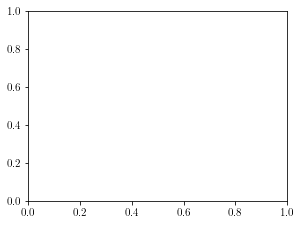

In [119]:
batch_plot_kinematics_vertices()